In [1]:
# Import necessary libraries
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

from keras.optimizers import Adam

# Define the image size and batch size
img_size = (224, 224)
batch_size = 32

# Create a data generator for training and validation datasets
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load and prepare the training dataset
train_generator = train_datagen.flow_from_directory('/content/sample_data/spiral/train', target_size=img_size, batch_size=batch_size, class_mode='binary')

# Load and prepare the validation dataset
val_generator = val_datagen.flow_from_directory('/content/sample_data/spiral/val', target_size=img_size, batch_size=batch_size, class_mode='binary')



KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Define the image size and batch size
img_size = (224, 224)
batch_size = 32
data_dir= '/content/drive/MyDrive/Datasets/XOR'
# Create a data generator for training and validation datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=img_size,
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=img_size,
  batch_size=batch_size)


Found 248 files belonging to 2 classes.
Using 199 files for training.
Found 248 files belonging to 2 classes.
Using 49 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Healthy', 'Patient']


In [ ]:
print(len(train_ds))

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
!unzip "/content/sample_data/spiral.zip" -d "/content/sample_data/"

In [ ]:
# Create the ResNet-50 base model (without the top layer)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create the model by adding custom top layers
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# Train the model
history = model.fit(train_ds, epochs=10, validation_data=val_ds)


Epoch 1/10
7/7 [==============================] - 87s 8s/step - loss: 2.1645 - accuracy: 0.4824 - val_loss: 2.1322 - val_accuracy: 0.4694
Epoch 2/10
7/7 [==============================] - 44s 6s/step - loss: 1.1727 - accuracy: 0.5377 - val_loss: 0.6509 - val_accuracy: 0.6531
Epoch 3/10
7/7 [==============================] - 46s 6s/step - loss: 0.6252 - accuracy: 0.7085 - val_loss: 0.4606 - val_accuracy: 0.7551
Epoch 4/10
7/7 [==============================] - 45s 6s/step - loss: 0.5190 - accuracy: 0.6985 - val_loss: 0.4111 - val_accuracy: 0.7551
Epoch 5/10
7/7 [==============================] - 45s 6s/step - loss: 0.4690 - accuracy: 0.8141 - val_loss: 0.3733 - val_accuracy: 0.7959
Epoch 6/10
7/7 [==============================] - 46s 6s/step - loss: 0.4367 - accuracy: 0.7538 - val_loss: 0.3923 - val_accuracy: 0.7551
Epoch 7/10
7/7 [==============================] - 44s 6s/step - loss: 0.3812 - accuracy: 0.8291 - val_loss: 0.3468 - val_accuracy: 0.8571
Epoch 8/10
7/7 [==================

In [ ]:
# Save the model
model.save('path/to/save/model.h5')

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np



# Evaluate the model on the testing set
test_results = model.evaluate(val_generator, steps=len(val_generator))
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])

# Make predictions on the testing set
y_pred = model.predict(val_generator, steps=len(val_generator))
y_true = np.array(val_generator.classes)

# Convert predictions to binary values (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_binary))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_binary)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0, 1], ['Healthy', 'Patient'])
plt.yticks([0, 1], ['Healthy', 'Patient'])
plt.show()

# Plot learning curve
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


NameError: name 'val_generator' is not defined

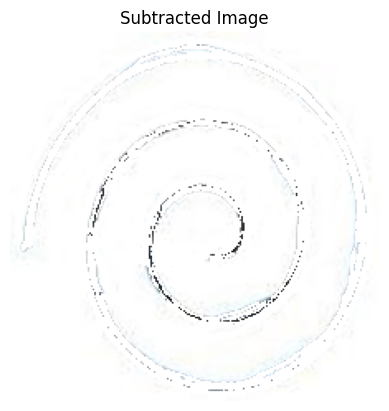

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images
image1 = cv2.imread('/content/sp3-H19.jpg')
image2 = cv2.imread('/content/sp1-H5.jpg')

image1=cv2.resize(image1,(224,224))
image2=cv2.resize(image2,(224,224))

# Subtract the pixel values of image2 from image1
result = cv2.absdiff(image1, image2)

# Convert the result to grayscale
result_gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

# Threshold the grayscale image to create a binary mask
_, mask = cv2.threshold(result_gray, 30, 255, cv2.THRESH_BINARY)

# Set the pixels in the original image to white where the mask is non-zero
image1[mask != 0] = [255, 255, 255]

# Display the result

# Convert BGR to RGB for displaying with matplotlib
result_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Display the result using matplotlib
plt.imshow(result_rgb)
plt.title('Subtracted Image')
plt.axis('off')  # Turn off axis labels
plt.show()



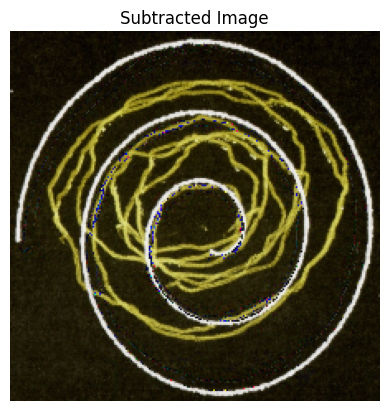

In [ ]:
import cv2
import numpy as np

dst = cv2.bitwise_xor(image1,image2)
# Convert BGR to RGB for displaying with matplotlib
result_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

# Display the result using matplotlib
plt.imshow(result_rgb)
plt.title('Subtracted Image')
plt.axis('off')  # Turn off axis labels
plt.show()


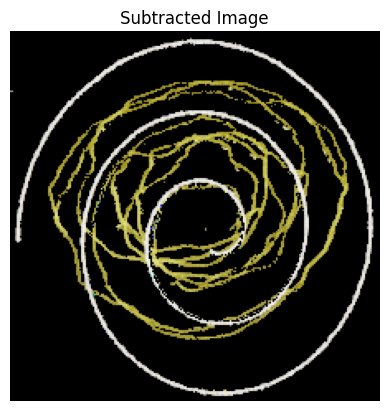

In [ ]:

# Convert the image to grayscale

gray_image = cv2.cvtColor(result_rgb, cv2.COLOR_BGR2GRAY)

# Threshold the image to create a binary mask of white pixels
_, binary_mask = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)

# Invert the binary mask
binary_mask = cv2.bitwise_not(binary_mask)

# Replace white pixels with black pixels in the original image using the binary mask
result_rgb[binary_mask == 255] = [0, 0, 0]
#result_rgb = cv2.resize(result_rgb, (224, 224,3))
# Display the modified image
plt.imshow(result_rgb)
plt.title('Subtracted Image')
plt.axis('off')  # Turn off axis labels
plt.show()


In [ ]:
for i in range (0,224):
  for j in range (0,224):
    if result_rgb[i][j]

In [ ]:
result_rgb[125][50][2]

112